# Data Visualisation in Python

This notebook provides an overview of data visualisation including (1) theories, (2) visual elements, (3) chart selection, and (4) dataviz in Python. Noted that this is not a comprehensive review of data visualisation but rather used to refresh your knowledge about data visualisation.

Ones who are really interested in data visualisation may find the below materials useful:

* Fundamentals of Data Visualization (Claus Wilke) [link](https://serialmentor.com/dataviz/)
* The Data Visualisation Catalogue [link](https://datavizcatalogue.com/)
* Visualization with Matplotlib [link](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html)

In this notebook, we use `matplotlib` and `seaborn` to demonstrate how visual elements can be used to create good visualisation.

# Visualisation steps
Below are systematic steps to develop a visualisation.

1. Determine what you are trying to show
2. Choose a visualisation method
3. Create the visualisation
4. Distribute your work

These 4 simple steps are very intuitive and many have followed these steps to build their visualisation products without being taught to do so. However, there are also many that build visualisation without following these steps; actually, we have seen many jump directly to step 3 and build their visualisation (using their favourite dataviz software) with a wishful thinking that it may be useful somehow. While it is true that it only takes seconds or minutes to create such a visualisation, visualisation builders may have to spend more time to build a story from their visualisation, go through many iterations to refine it, or mislead the audience who rely on the visualisation to make decisions.

# Visual concepts
Different visual variables can be used to visualise the data of interest. Some basic visual variables from `Fundamentals of Data Visualization (Claus Wilke)` are: 

![visual elements 1](https://serialmentor.com/dataviz/aesthetic_mapping_files/figure-html/common-aesthetics-1.png)

A very popular categorisation from Bertin:

![Bertin's visual variables](https://www.axismaps.com/guide/general/visual-variables/visual_variables.png)

By wisely determine a suitable visual variable or their combinations, analysts or researchers can reveal interesting patterns and insights from the dataset.

MacKinlay introduced an interesting ranking of visual elements/variables based on the visualisation purposes and data types:

![mackinlay](https://infovis-wiki.net/w/images/0/0b/Mackinlay_PerceptualTask.jpg)

# How to choose what types of charts for your visualisation?

Experienced analysts and researchers can be more efficient in identifying the type of chart that is suitable for their purpose. However, for complex datasets, choosing the right charts is not trivial. 

[The Data Visualisation Catalogue](https://datavizcatalogue.com/) provides great descriptions of common charts and some practical tips. 

Tableau has a beautiful interactive [visual vocabulary](https://www.tableau.com/solutions/gallery/visual-vocabulary) and categorises charts based on data relationship.

![visual-v](https://cdns.tblsft.com/sites/default/files/blog/visual_vocab.png)

# Examples

We use `mtcars` and `Daily Temperatures` datasets to demonstrate key concepts of dataviz since they are lightweight and have different data types for us to explore.

Columns for `mtcars` dataset

1.	**mpg**:	Miles/(US) gallon
2.	**cyl**:	Number of cylinders
3.	**disp**:	Displacement (cu.in.)
4.	**hp**:	Gross horsepower
5.	**drat**:	Rear axle ratio
6.	**wt**:	Weight (1000 lbs)
7.	**qsec**:	1/4 mile time
8.	**vs**:	Engine (0 = V-shaped, 1 = straight)
9.	**am**:	Transmission (0 = automatic, 1 = manual)
10.	**gear**:	Number of forward gears
11.	**carb**:	Number of carburetors

Columns for `Daily Temperatures` datasets
1. Date (`yyyy-mm-dd`)
2. Temputerature (`degrees Celsius`)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

## Visualise `mtcars` dataset

For this dataset, we are interested in fuel consumption and 10 aspects of automobile design (see above). Thus the first task is to understand the distribution of fuel consumption of cars included in this dataset.

Some notes:

* dataset is loaded into a pandas `dataframe`
* visualisation is created with `seaborn`



In [ ]:
# Import CSV mtcars
df = pd.read_csv('https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/64f1660f38ef523b2a1a13be77b002b98665cdfe/mtcars.csv')
# Edit element of column header
df.rename(columns={'Unnamed: 0':'brand'}, inplace=True)
df.columns

Index(['brand', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

Although `seaborn` facilitates many steps to generate a visualisation, the users need to make some adjustments to make sure that all essential information is included and well presented. For example, we may want to edit/add the labels for x-axis and y-axis in the below histogram of fuel consumption.

Text(0, 0.5, 'Frequency')

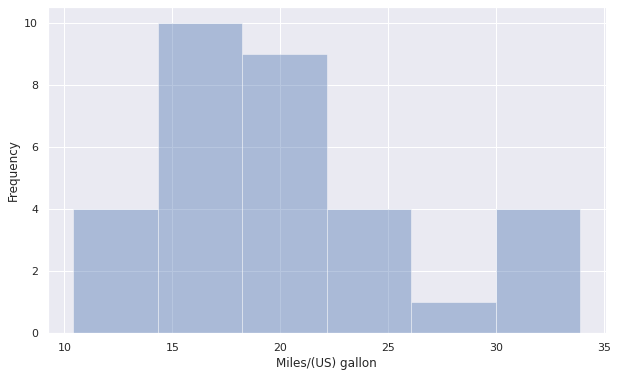

In [ ]:
plt.subplots(figsize=(10,6))
ax = sns.distplot(df["mpg"], kde=False)
ax.set_xlabel("Miles/(US) gallon")
ax.set_ylabel("Frequency")

One of our objectives is to visualise data distribution, we can visit [The Data Visualisation Catalogue](https://datavizcatalogue.com/) to see what other charts can be useful for this task. We can that the follow charts (available in `seaborn`) can be used:

* Density plot
* Boxplot
* Violine plot



Text(0.5, 0, 'Miles/(US) gallon')

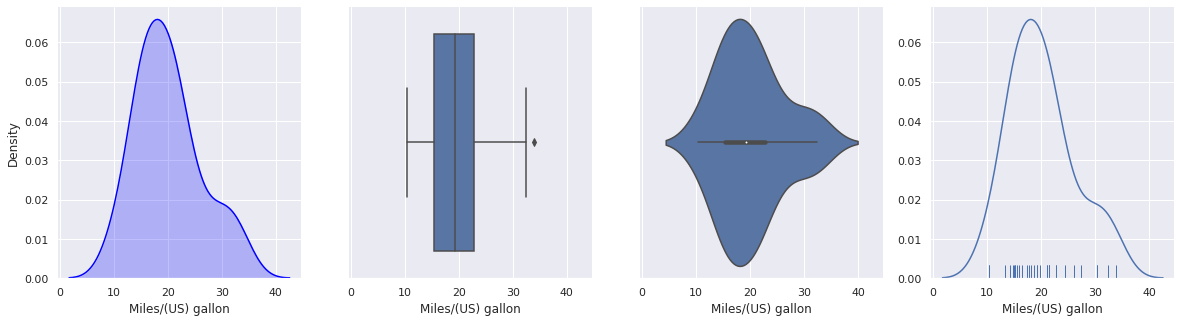

In [ ]:
# Set up the matplotlib figure
f, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True)
sns.despine(left=True)

# density plot
ax = sns.distplot(df["mpg"], hist=False, color="blue", kde_kws={"shade": True}, ax=axes[0])
ax.set_xlabel("Miles/(US) gallon")
ax.set_ylabel("Density")

# Boxplot
ax = sns.boxplot(df["mpg"], ax=axes[1])
ax.set_xlabel("Miles/(US) gallon")

# Boxplot
ax = sns.violinplot(df["mpg"], ax=axes[2])
ax.set_xlabel("Miles/(US) gallon")

# hybrid
ax = sns.distplot(df["mpg"], hist=False, rug=True, ax=axes[3])
ax.set_xlabel("Miles/(US) gallon")

Now, let's say we are happy with the above visualisations. The next step is to identify relationship between `mpg` and other design aspects.

One simple approach to visualise the correlations is `scatter plot`

We first check the correlation between **fuel consumption** `mpg` and number of **cylinders** `cyl`

(5.0, 40.0)

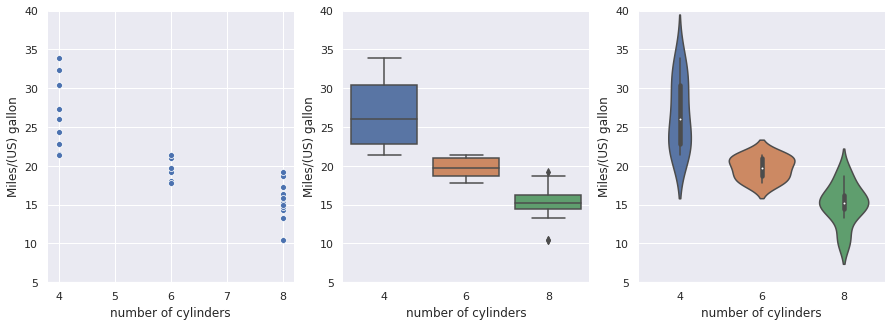

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.despine(left=True)

ax = sns.scatterplot(x="cyl", y="mpg", data=df, ax=axes[0])
ax.set_xlabel("number of cylinders")
ax.set_ylabel("Miles/(US) gallon")
ax.set_ylim(5,40)

ax = sns.boxplot(x="cyl", y="mpg", data=df, ax=axes[1])
ax.set_xlabel("number of cylinders")
ax.set_ylabel("Miles/(US) gallon")
ax.set_ylim(5,40)

ax = sns.violinplot(x="cyl", y="mpg", data=df, ax=axes[2])
ax.set_xlabel("number of cylinders")
ax.set_ylabel("Miles/(US) gallon")
ax.set_ylim(5,40)

Since `mtcars` only have 11 columns, we can easily check and visualise its correlation matrix with:

*   `pandas` built-in correlation matrix, or
*   `seaborn` scatterplot matrix (this option is more time-consuming)



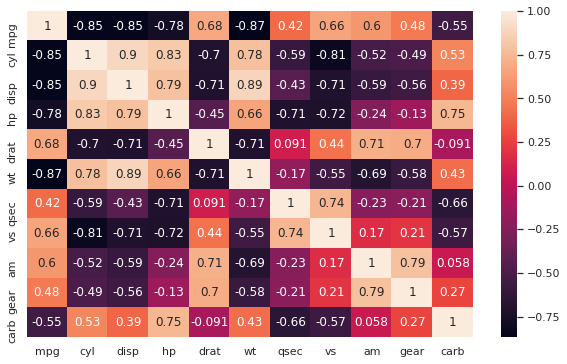

In [ ]:
plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


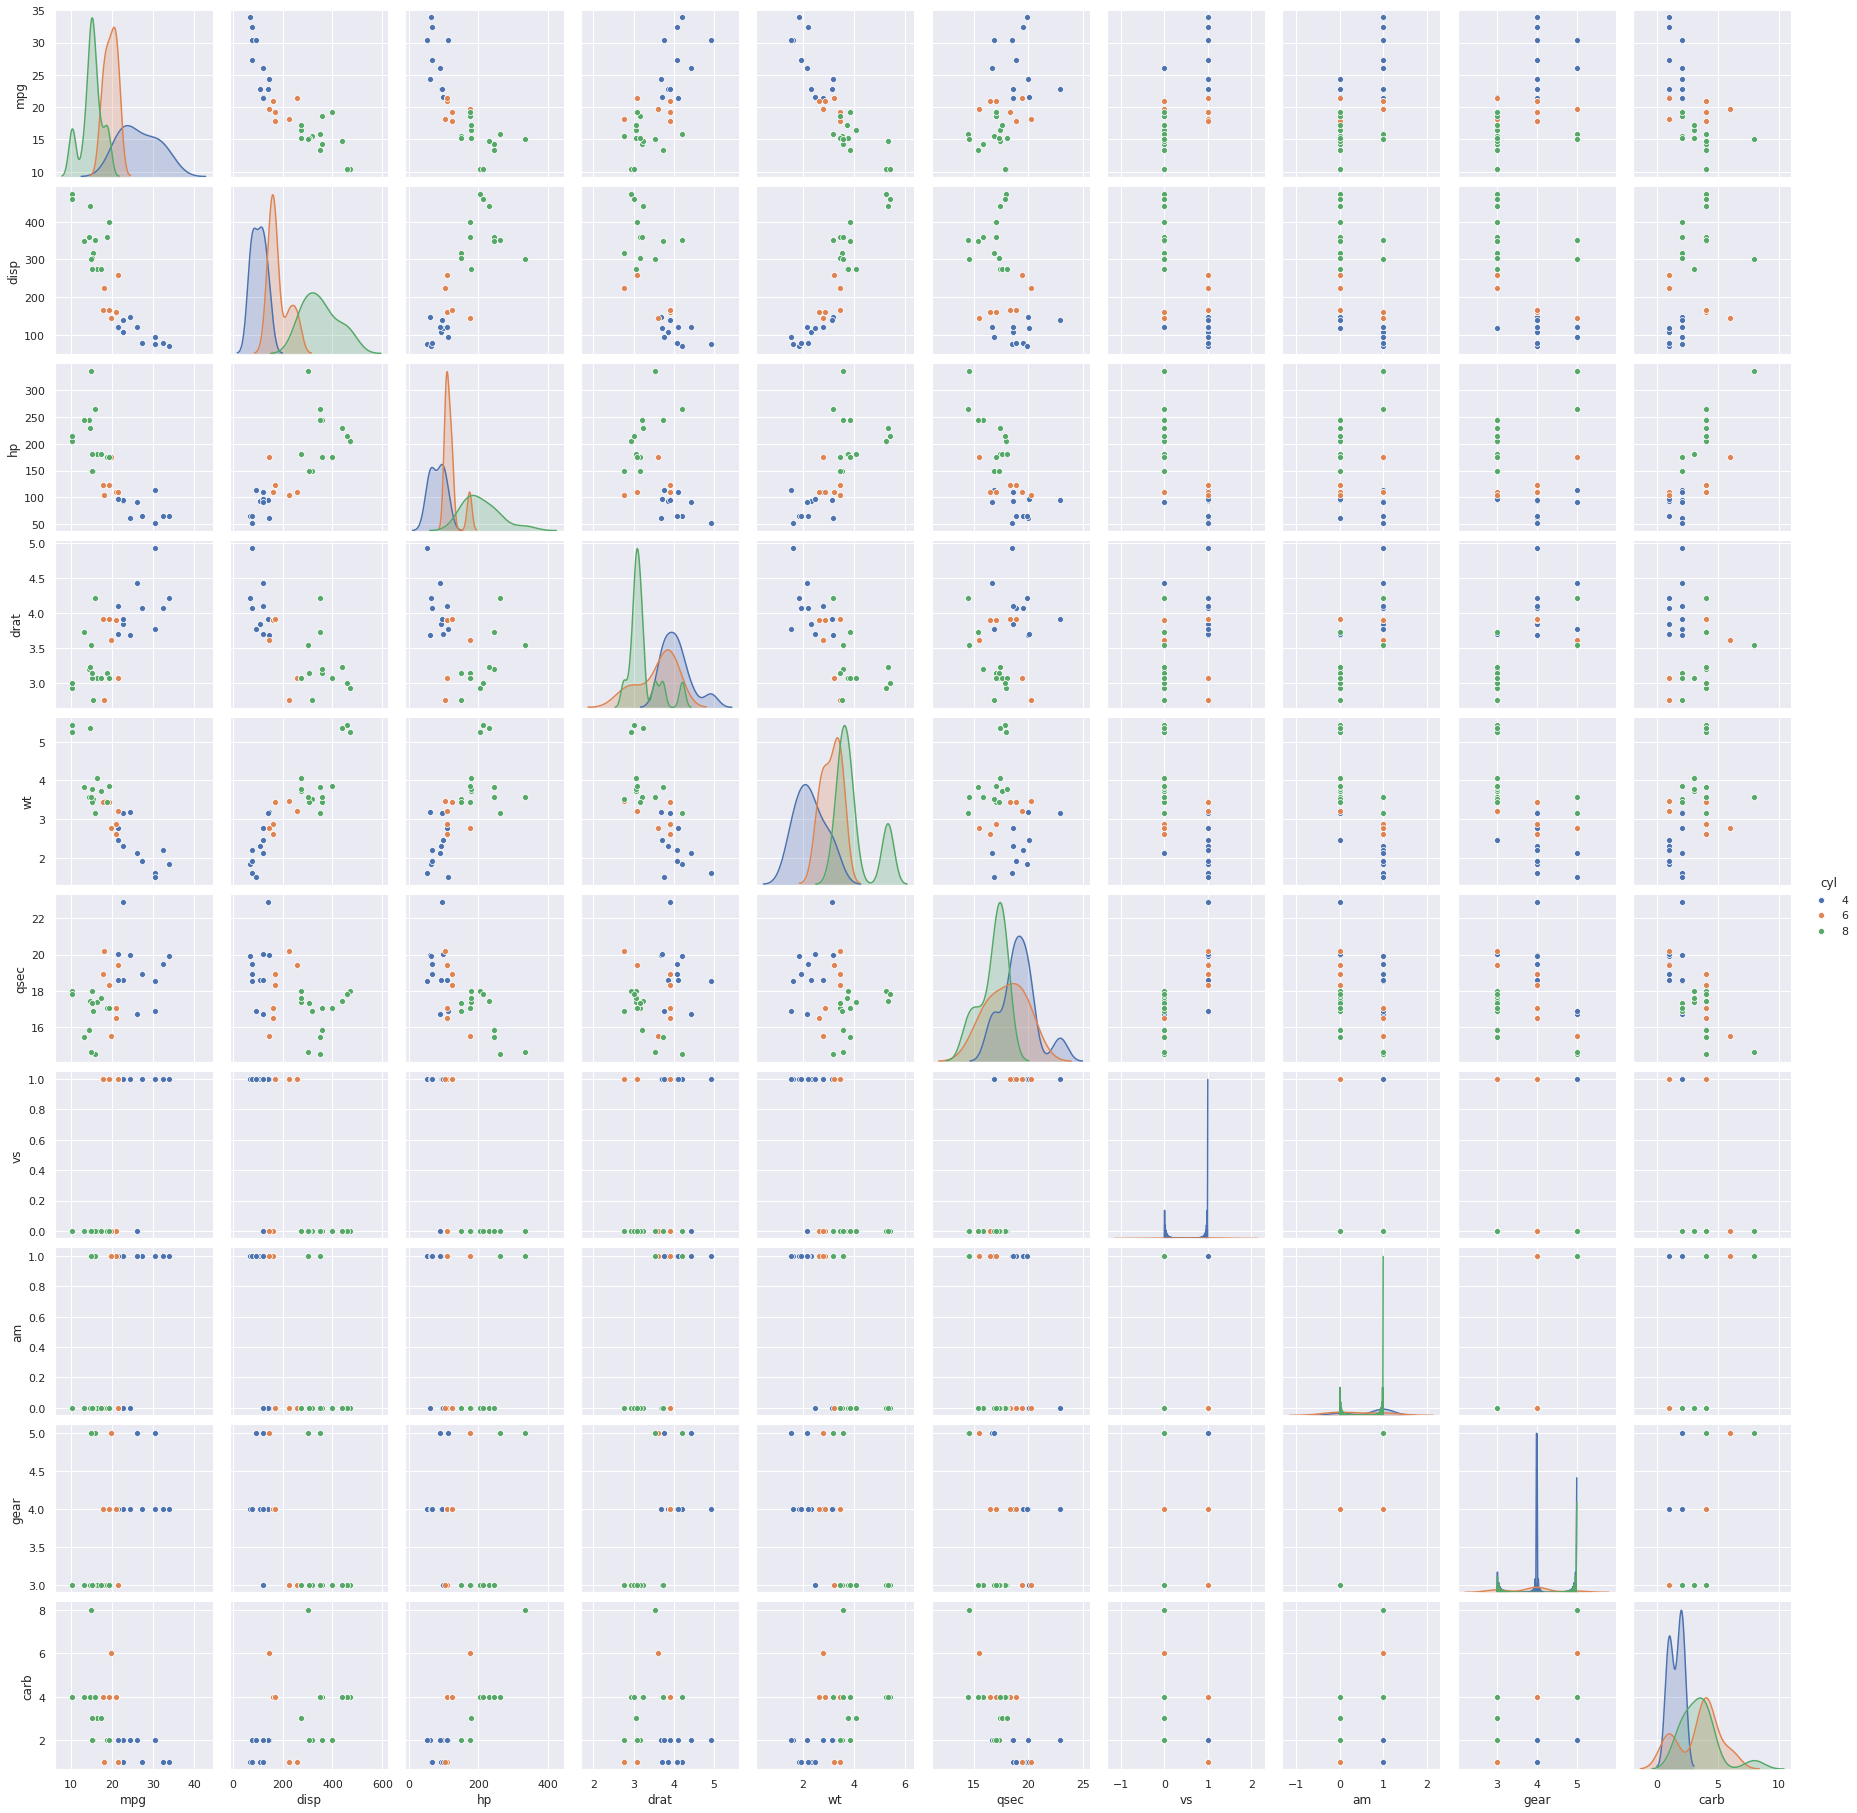

In [ ]:
sns.pairplot(df, hue="cyl")

## Dimension reduction for visualisation
The above visualisation allows the analysts and researchers examine the correlations between variables independently. However, real-world data can be very complex and have many interactions between variables.

To achive a more comprehensive view of the dataset, we will use dimension reduction techniques for visualisation:

* Principal Component Analysis (PCA)
* Uniform Manifold Approximation and Projection (UMAP)

In [ ]:
# pre-process the dataset
train_df = df.drop(["brand", "mpg"], axis=1)
normalized_df=(train_df-train_df.min())/(train_df.max()-train_df.min())

Noted that we only use car-design variables in dimension reduction to avoid biases towards `mpg`. The `brand` column is also removed.

In [ ]:
# visualise latent represention of the dataset
def visualise_dimension_reduction(embedding, df):
  plt.subplots(figsize=(10,6))
  ax = sns.scatterplot(embedding[:,0], embedding[:,1], hue=df["cyl"].astype('category'), data=df, size = "mpg")  
  for line in range(0,df.shape[0]):
      ax.text(embedding[line,0], embedding[line,1], df.brand[line], horizontalalignment='left', size=10, color='gray')
  # ax.set_xlim(4,13)

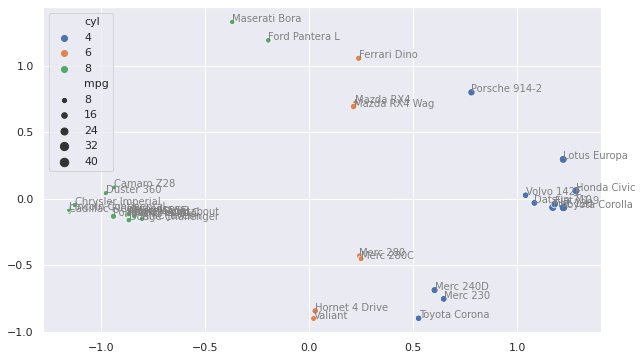

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
embedding = pca.fit_transform(normalized_df)
visualise_dimension_reduction(embedding, df)

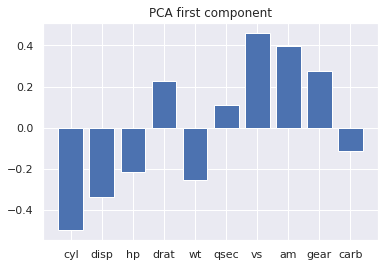

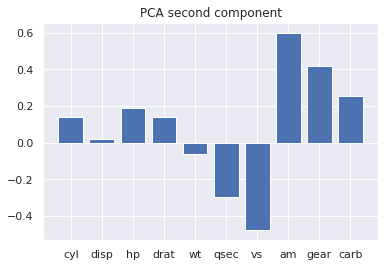

In [ ]:
pca.components_.shape
plt.bar([df.columns[i] for i in range(len(df.columns)) if i > 1], pca.components_[0])
plt.title("PCA first component")
plt.show()
plt.bar([df.columns[i] for i in range(len(df.columns)) if i > 1], pca.components_[1])
plt.title("PCA second component")
plt.show()

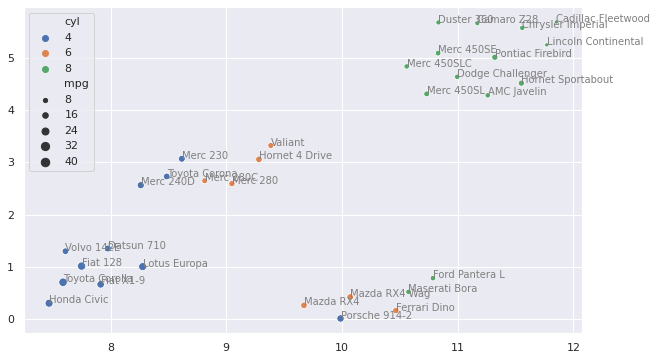

In [ ]:
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(normalized_df)
visualise_dimension_reduction(embedding, df)

Both PCA and UMAP work well for this dataset. It is noted that the x-axis and y-axis here represent the two latent dimension obtained by PCA and UMAP. If two cars, represented by two points, are close to each other, they have similar design. Apart from the position of each car in the latent space, we also use color to represent `cyl` and marker size to represent `mpg`. 

It is easy that the design is strongly guided by `cyl`. From the visualisation, we can see cars with different number of cylinders tends to belong to the same group. While the designs of cars with 4 and 8 cylinders are very different, the designs with 6 cylinders share some similarity with cars of the other two groups.

By observing the marker sizes, we can see that design variables are strong predictors of fuel consumption or `mpg`. Most efficient cars are group in the right side of PCA visualisation or bottom left of UMAP visualisation.

In general the difference between PCA and UMAP is minor for this dataset. One key advantage of PCA is that we can interpret each principle component, as shown in the previous visualisations. For example, the first component emphasises on the number of cylinders, which explains why cars are ordered by the number of cylinders along the x-axis. The second component emphasises on the engine (v-shape, auto/manual).

One interesting observation is that `Porsche 914-2` is positioned somewhere between 4-cyl and 6-cyl groups in PCA but it is much closer to `Mazda RX4` group in UMAP. When examining the raw data, we see that `Porsche 914-2` belongs to this group because it is the only 4-cyl car with `v-shaped engine`.


In [ ]:
df.sort_values(by="cyl")

,brand,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.60,1,1,4,2
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2


## Visualise `Daily Temperatures` dataset


For this dataset, we are interested in both the distribution of temperature in general and seasonal patterns.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv")
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8




```
# This is formatted as code
```

Using line chart is a simple way to visualise such time series but it is quite messy.

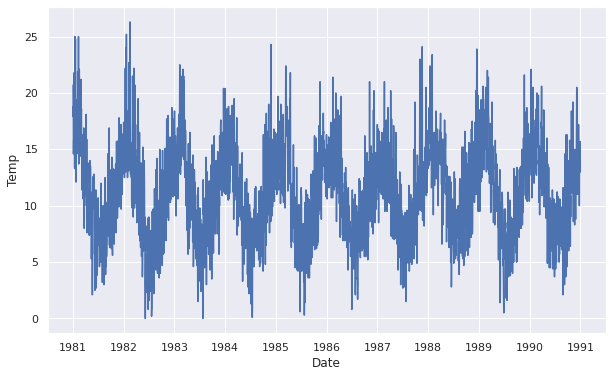

In [ ]:
plt.subplots(figsize=(10,6))
sns.lineplot(x="Date", y="Temp", data=df)

Using the density plot and histogram allow us to see the general distribution without any context.

Text(0.5, 0, 'Temperature (0C)')

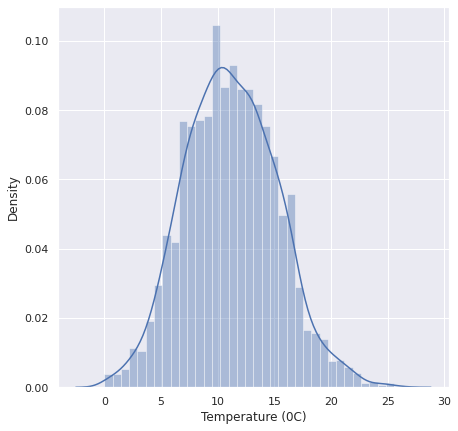

In [ ]:
plt.subplots(figsize=(7,7))
ax = sns.distplot(df["Temp"])
ax.set_ylabel("Density")
ax.set_xlabel("Temperature (0C)")

Boxplots with data grouped by years or months are good option as they can reveal both the temperature distributions and seasonal patterns.

Text(0, 0.5, 'Temperature (0C)')

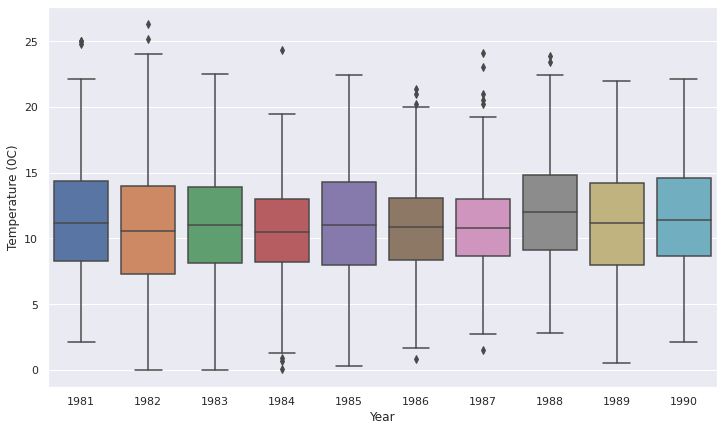

In [ ]:
plt.subplots(figsize=(12,7))
ax = sns.boxplot(x = df.Date.dt.year, y="Temp", data=df)
ax.set_xlabel("Year")
ax.set_ylabel("Temperature (0C)")

Text(0, 0.5, 'Temperature (0C)')

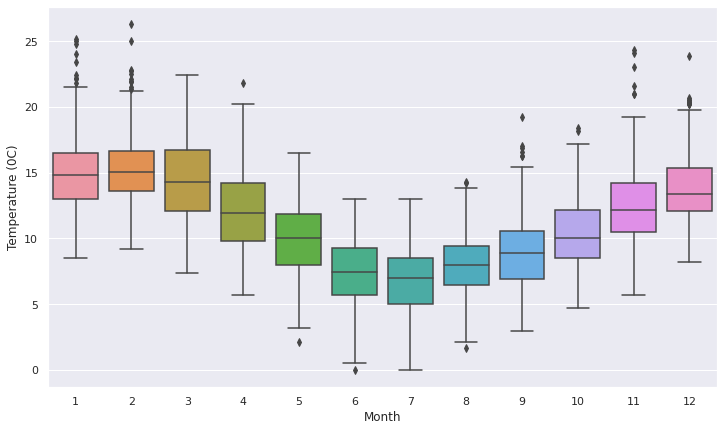

In [ ]:
plt.subplots(figsize=(12,7))
ax = sns.boxplot(x = df.Date.dt.month, y="Temp", data=df)
ax.set_xlabel("Month")
ax.set_ylabel("Temperature (0C)")

If it is important to visualise the whole dataset, we can convert the data into 2D array and use `matshow` to visualise.

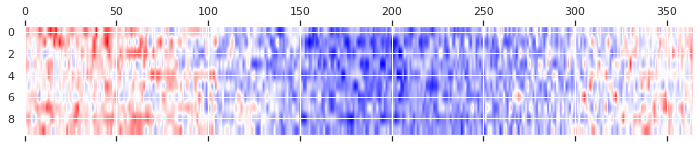

In [ ]:
years = []
for year in np.unique(df["Date"].dt.year):
  years.append(df[df["Date"].dt.year==year]["Temp"].values)
years = np.array(years)
fig, ax = plt.subplots(figsize=(12,2))
ax.matshow(years, interpolation=None, aspect='auto', cmap='bwr')

Another option is to use `seaborn` built-in lineplot with data group by seasonal features (week, day of year). With the right choice of seasonal features, the visualisation can reveal clear insights/patterns. 

Text(0.5, 0, 'Month of year')

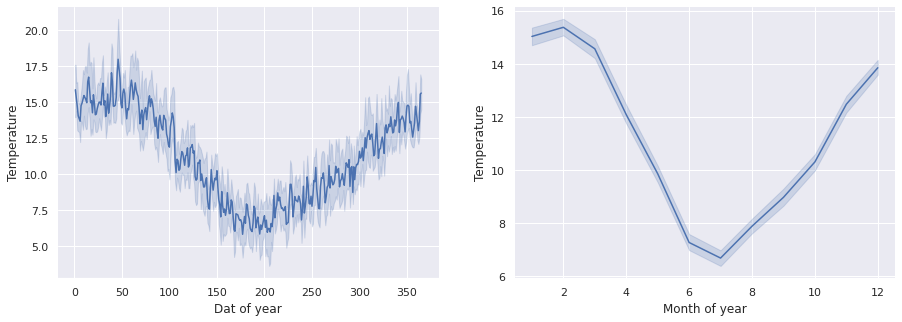

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.despine(left=True)

ax = sns.lineplot(x=df["Date"].dt.dayofyear, y="Temp", data=df, ax=axes[0])
ax.set_ylabel("Temperature")
ax.set_xlabel("Dat of year")
ax = sns.lineplot(x=df["Date"].dt.month, y="Temp", data=df, ax=axes[1])
ax.set_ylabel("Temperature")
ax.set_xlabel("Month of year")

# Summary

This notebook provides a brief review of data visualisation concepts and some common charts used to visualise data distribution, relationships between variables, and also explore some dimension reduction techniques to cope with high-dimensional data.

There is no universal solution for all data visualisation tasks and some trials-and-errors are needed. However, by following the systematic steps, we can be more efficient in building good visualisations. Advanced techniques such as dimension reduction is promising, especially for high-dimensional datasets but it is important to understand their implications and assumptions.

All data used for visualisations in this notebook are managed by `pandas` `dataframe`. While we can visualise data without `dataframe` (e.g. using `numpy` array instead), `dataframe` makes it convenient to query data and to perform some common data transformation tasks. 